# Machine Learning, Neural Networks, Deep Learning, and Transformers

## Machine Learning
Machine Learning is the **artificial generation of knowledge from experience**, i.e., a system is *trained* to solve a problem instead of explicitly programming the rules. The system learns from examples and can generalize them after the learning phase. The goal of *training* is to let the algorithm build a statistical model by recognizing patterns and regularities in a set of training data which is tested against test data. The system should be able to make predictions for new, unseen data. Machine learning can be used for many problems, providing a wide range of techniques, e.g.:

* **Regression**: linear and logistic regression, Naive Bayes
* **Classification**: Support Vector Machines, Decision Trees (including Random Forests and Boosting)
* **Clustering**: $k$-means, $k$-NN, DBSCAN
* **Dimensionality reduction**: Principal Component Analysis (PCA), t-SNE

The following are the most important paradigms of machine learning:

* **Supervised learning**: the data consists of labeled examples, i.e., each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is to learn a function that maps feature vectors (inputs) to labels (output). This function is infered from labeled training data, i.e., features are learned using labeled input data. Each example is a pair consisting of an input object (typically a vector) and a desired output value. The function produced by the algorithm can be used for mapping new examples, e.g., for classifying unseen instances.
* **Semi-supervised learning** (weak supervision): during training, a small set of labeled data is combined with a large set of unlabeled data. It stems from situations where unlabeled data is abundant and labeled data is expensive to obtain. The algorithm is provided with unlabeled data and supervision examples (but not necessarily for all examples). High-level assumption about the smoothness, low-dimensional structure, or distance metrics of the labeled data are used to infer the correct labels for the unlabeled data.
* **Unsupervised learning**: the algorithm learns patterns from unlabeled input data. It is often used to discover hidden patterns (anomaly detection) and data groupings (clustering) or to perform principal component analysis for dimension reduction.
* **Self-supervised learning**: the algorithm does not need human-annotated labels and is fed unlabeled data. Usually, the neural network is first presented with a pretext task to initialize the model parameters. This task is often based on pseudo labels that have been derived from the unlabeled input data. Afterwards, a downstream task (i.e., the actual task) is solved utilizing supervised or unsupervised learning.

## Neural Networks

### The Perceptron

At its core, a neural network is a collection of simple processing units (**perceptrons**). The concept of a "neuron" was first introduced in 1943 by Warren McCulloch and Walter Pitts (McCulloch-Pitts neuron),<a name="footnote_ref-1"></a>[<sup>1</sup>](#footnote-1) the first implementation of a perceptron was built in 1958 by Frank Rosenblatt.<a name="footnote_ref-2"></a>[<sup>2</sup>](#footnote-2) The perceptron is a **linear classifier** (also known as **Threshold Processing Unit**) and consists of the following components:
* A set of inputs, consisting of
    * input information ($X_1 \ldots X_n$), and
    * weights ($w_1 \ldots w_n$),
* A bias ($X_0$, where $X_0=1$). The bias is necessary to shift the activation function to the left or right. This is critical for successful learning, as it gives the algorithm more flexibility.
* A sum function to aggregate the inputs, and
* An activation function which leads to a single output.

![A single perceptron](img/perceptron.png)

The weights $w_1 \ldots w_n$ are the heart of the perceptron, as they determine the strength of each input signal to it, i.e., the input signals $X_1 \ldots X_n$ interact multiplicatively with the weights (e.g., $X_1 \times w_1$). The perceptron then computes the weighted sum of the inputs (i.e., it calculates a dot product with the input and its weights) and adds the bias to it:

$$z = {\sum_{i} X_i w_i} + X_0 w_0$$

Afterwards, an activation function is applied, a mathematical function to determine the output given its input. It determines whether the perceptron can must be activated or not. This is determined by the input form the sum function and a threshold value. Perceptrons use a threshold activation function, in this case the Heaviside step function:

$$H(x) = \begin{cases} 1 \text{ if } x \ge 0 \\ 0 \text{ if } x < 0 \end{cases}$$

The algorithm to use a perceptron as a linear classifier is as follows:<a name="footnote_ref-3"></a>[<sup>3</sup>](#footnote-3)
1. Initialize the weights (either by assigning them the value 0 or another small random value).
2. For each training sample $X_n$:
    1. Calculate the output value, i.e., multiply the input with its weight, add the bias and apply the activation function.
    2. Compare the prediction with the desired output and update the weights
        1. If the output is correct, the weight remains unchanged.
        2. If the output is 0 but should be 1, the weights are incremented.
        3. If the output is 1 but should be 0, the weights are decremented.
    3. Repeat until the model converges.

The following image shows the usage of a perceptron as a **linear classifier**. There are 2 classes (red and blue) and 2 dimensions ($X_1$ and $X_2$). The goal is to fit an optimal  hyperplane that correctly separates the data into two classes. In this case, the activation function is a stepwise function. It takes the result of $\sum_{i} X_n w_n + X_0 w_0$ (i.e., the **activation**) and determines whether a data point is below or above the hyperplane. If the activation is $>0$, the model outputs 1, if the activation is $\leq 0$, it outputs 0.<a name="footnote_ref-4"></a>[<sup>4</sup>](#footnote-4)

![Perceptron as linear classifier](img/perceptron_linear_classifier.png)

### From the Perceptron to Neural Networks

A single perceptron has a major drawback: it only works for data that is linearly separable. This is due to the way the algorithm works as it is based on the idea of adjusting the weights until the output of the perceptron matches the desired output. If applied to linearly separable data, the perceptron algorithm is **guaranteed to converge**, i.e., it is able to find a set of weights that allows it to correctly classify all training examples.<a name="footnote_ref-5"></a>[<sup>5</sup>](#footnote-5)

Multiple perceptrons can be combined into a structure known as **multi-layer perceptron** (MLP), a simple type of neural networks (also referred to as *vanilla neural network*). MLPs are able to solve non-linear problems, as they can use non-linear activation functions, commonly Sigmoid functions or Rectified Linear Unit (ReLU). Formally, "true" perceptrons are a special case of artificial neurons that use a threshold activation function (such as Heaviside) and only perform binary classification.<a name="footnote_ref-6"></a>[<sup>6</sup>](#footnote-6) Combining multiple perceptrons into a neural network basically has two effects:

1. Neural networks are able to store more information with increasing complexity (due to an increased number of parameters).
2. MLP neurons can perform regression **or** classification, depending on their activation function.

In a neural network, the output of some neurons become the inputs of other neurons. The **network topology** describes the number of neurons and the number of layers they are organized in, the most common type being **fully-connected layers** where neurons between two adjacent layers are fully pairwise connected, but no neurons share connections within the same layer. Neural networks have three types of layers:

1. Input layer
2. Hidden layer(s)
3. Output layer

When determining the number of layers in a network, the input layer is not counted. Therefore, the following image displays a 2-layer and a 3-layer neural network.

![Neural Network](img/neural_networks.png)

There are different types of neural networks, with the type being determined by the information flow within the network.

* **Feed-forward NNs**: information can only flow in one direction, from the input layer to the output layer.
* **Recurrent NNs**: connections between nodes can create a cycle, i.e., neurons can be connected to neurons from the same layer or a previous layer. Information from previous throughputs can be used to affect the current inputs and/or outputs.
* **NNs with backpropagation**: the model performs a backward pass to adjust its parameters. The output from the forward propagation is compared to the desired output and the difference betweent the two is considered the error $E$. The error is propagated backwards through the network and the weights of the connections between neurons are changed depending on their influence on the error $E$.

### Perceptron Example in Python

The following example ins an implementation of the perceptron with randomly generated synthetic data. For convenience, linearly separable data is generated with the `make_blobs()` function from scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

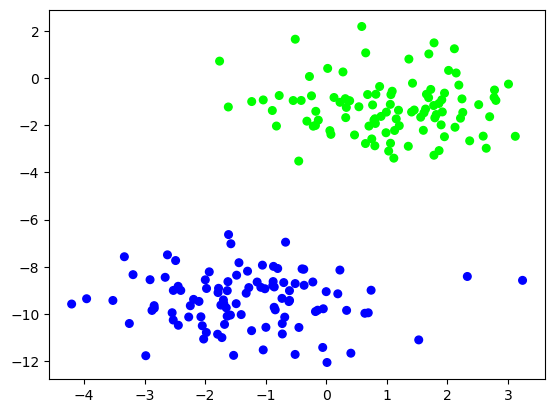

In [2]:
np.random.seed(1)

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples = 200,
                           n_features = 2,
                           centers = 2,
                           cluster_std = 1.1,
                           random_state = 2)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.brg)
plt.show()

Now, two functions are defined: `train_perceptron()` to train the perceptron on training data, and `predict_perceptron()` to make predictions on test data.<a name="footnote_ref-7"></a>[<sup>7</sup>](#footnote-7)

The first part of the training function is straightforward: calculate the dot product of input and weight, add the bias, and pass the result through the Heaviside activation function (which is imported from numpy).

Then the weights and bias are updated according to the algorithm:
* The comparison between actual value and predicted value happens in the `(y[i] - y_pred[i])` part:
    * If the prediction is correct, this part results in 0 and the weight remains unchanged.
    * If the prediction is 0 but should be 1, the weights are incremented due to the positive sign of the subtraction result.
    * If the prediction is 1 but should be 0, the weights are decremented due to the negative sign of the subtraction result.
* The new weight is then calculated with inputs from the learning rate and the training training data, e.g. for the initial iteration:

$$\underbrace{0}_{\text{bias}} \times \underbrace{(1 - 0.0)}_{\text{actual vs pred}} \times \underbrace{0.31994533}_{\text{input} X_{1_1}}
$$

$$
\underbrace{0}_{\text{bias}} \times \underbrace{(1 - 0.0)}_{\text{actual vs pred}} \times \underbrace{-1.67994085}_{\text{input} X_{1_2}}
$$

The function also take two **hyperparameters** that are used to control the training process. These parameters are used by the supervisor to directly contorl the NNs behavior and tune the learning process.
* **Epochs**: An epoch is an entire passing of the training data through the algorithm as training data is usually broken down into smaller batches to circumvent storage space limitations.
* **Learning rate**: the learning rate controls who much the model changes in response to the estimated error when the weights are updated. This is one of the most important parameters. If the parameter is too small, the learning process might be prolonged and might get stuck, if it is too big, the changes to the weight might be too severe and the result might not be optimal.

In [3]:
def train_perceptron(X, y, weights, bias, epochs, learning_rate):
    """Train the perceptron.
    
    Args:
    X             -- Input data
    y             -- Classes of the input data
    weights       -- Weight vector
    bias          -- Initial bias
    epochs        -- Number of epochs (hyperparameter)
    learning_rate -- Learning rate (hyperparameter)
    """
    for epoch in range(epochs):
        # For each training example
        for i in range(len(X)):
            # Calculate output value (dot product of input and weight + bias)
            z = np.dot(X, weights) + bias
            # Pass the output through the activation function to calculate the prediction
            y_pred = np.heaviside(z, 0)
            
            # Update the weights and bias
            weights = weights + learning_rate * (y[i] - y_pred[i]) * X[i]
            bias = bias + learning_rate * (y[i] - y_pred[i])
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch} complete.")
        
    return weights, bias
    
def predict_perceptron(X, weights, bias):
    """Predict the class of input data
    
    Args:
    X       -- Input data
    weights -- Weight vector
    bias    -- Bias
    """
    z = np.dot(X, weights) + bias
    prediction = np.heaviside(z, 0)
    return prediction

Now, the parameters are initialized. Both the weights and the bias are set to 0, but any random small value can be used instead. The data set is furthermore split into a training and a test set at the rate 80:20 (parameter `test_size`). Some functions are imported from *scikit-learn* for splitting the data and obtaining the classification report. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Initialize parameters
weights = np.zeros(X.shape[1])
bias = 0

# Define the hyperparameters
learning_rate = 0.01
epochs = 100

# Split the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now the model can be trained with the `train_perceptron` function. It returns the learned weights and bias which are saved to corresponding variables. 

In [6]:
weights_learned, bias_learned = train_perceptron(X_train, y_train, weights, bias, 100, 0.01)
print(10 * "-")
print(f"Learned weights: {weights_learned}")
print(f"Learned bias: {bias_learned}")

Epoch 0 complete.
Epoch 10 complete.
Epoch 20 complete.
Epoch 30 complete.
Epoch 40 complete.
Epoch 50 complete.
Epoch 60 complete.
Epoch 70 complete.
Epoch 80 complete.
Epoch 90 complete.
----------
Learned weights: [0.03473729 0.03384782]
Learned bias: 0.11999999999999998


We can now take the learned parameters and make predictions with the unseen test data set `y_test` using the previously defined function `predict perceptron`. This function multiplies the test input values by the learned weights and adds the learned bias. The resulting score is passed through the same Heaviside step function to determine the predicted class of each input.

In [7]:
pred = predict_perceptron(X_test, weights_learned, bias_learned)

The accuracy is determed using *scikit-learn*'s `accuracy_score` function. We can also obtain a classification report with another corresponding *scikit* function.

In [8]:
accuracy = accuracy_score(pred, y_test)
report = classification_report(pred, y_test, digits = 2, zero_division = 0.0)

print(f"Accuracy: {accuracy}")
print("\n Classification Report:")
print(report)

Accuracy: 0.975

 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [9]:
print(weights_learned)
print(type(weights_learned))

print(bias_learned)
print(type(bias_learned))

[0.03473729 0.03384782]
<class 'numpy.ndarray'>
0.11999999999999998
<class 'numpy.float64'>


Finally, we can plot the result, i.e., the **decision boundary**. The function `plot_perceptron` calculates the end points of the decision boundary hyperplane so that a line can be plottet between the two. The equation for a straight line is

$$y = mx + b$$

with $m$ being the slope and $b$ being the Y intercept. First, we determine the data points with the highest and lowest coordinate value on the x axis (`x1`). $m$ can be calculated as

$$m = \frac{\text{Change in y}}{\text{change in x}}$$

where the changes are represented by the weights. $b$ is the value of $y$ when $x=0$. The $x$ value can then be plugged into the equation to give us the other end point of the line.

In [10]:
def plot_perceptron(X, y, weights, bias):
    """Plot the input of a perceptron with the decision boundary.
    
    Args:
    X       -- Input data to plot: numpy array
    weights -- Weight vector of the trained perceptron: numpy array
    bias    -- Bias of the trained perceptron: float
    """
    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -weights[0] / weights[1]
    b = np.array([-bias / weights[1]])
    x2 = m * x1 + b
    
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.brg)
    plt.plot(x1, x2, c = "r")
    plt.show()

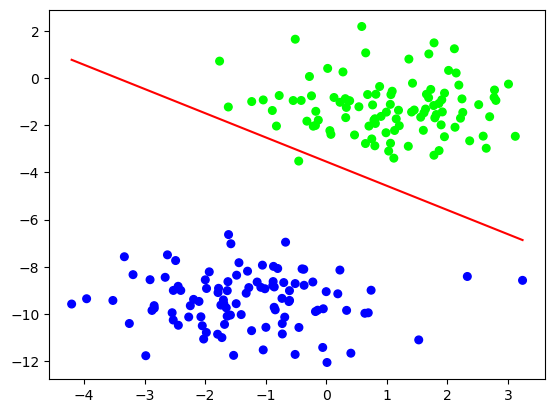

In [11]:
# Entire data set
plot_perceptron(X, y, weights_learned, bias_learned)

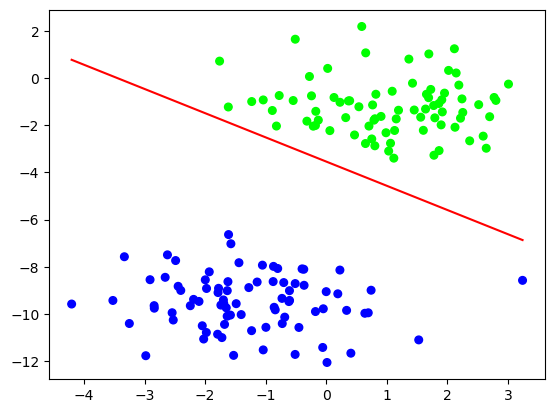

In [12]:
# Training set
plot_perceptron(X_train, y_train, weights_learned, bias_learned)

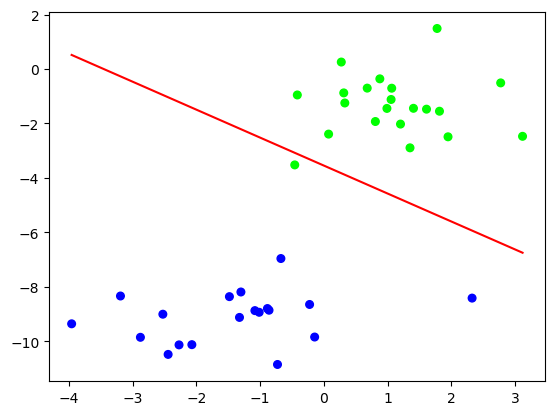

In [13]:
# Test set
plot_perceptron(X_test, y_test, weights_learned, bias_learned)

In [14]:
# from sklearn.linear_model import Perceptron
# clf = Perceptron(tol = 1e-3, random_state = 0)
# clf.fit(X, y)
# clf.score(X, y)

### Sources

<a name="footnote-1"></a><sup>1</sup> [McCulloch, W., Pitts, W. (1943), A Logical Calculus of Ideas Immanent in Nervous Activity, *Bulletin of Mathematical Biophysics* **5**, 127--147.](https://jontalle.web.engr.illinois.edu/uploads/410-NS.F22/McCulloch-Pitts-1943-neural-networks-ocr.pdf) [$\uparrow$](#footnote_ref-1) <br>
<a name="footnote-2"></a><sup>2</sup> [Rosenblatt, F. (1957), *The Perceptron. A Perceiving and Recognizing Automaton*, Report 85-460-1, Cornell Aeronautical Laboratory, Buffalo, NY.](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf) [$\uparrow$](#footnote_ref-2) <br>
<a name="footnote-3"></a><sup>3</sup> [Wikipedia (2023). *Perceptron*.](https://en.wikipedia.org/wiki/Perceptron#Steps) [$\uparrow$](#footnote_ref-3) <br>
<a name="footnote-4"></a><sup>4</sup> [Brownlee, J. (2020). *Perceptron Algorithm for Classification in Python*.](https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/), see also [Raschka, S. (2015). *Single-Layer Neural Networks and Gradient Descent*.](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) [$\uparrow$](#footnote_ref-4) <br>
<a name="footnote-5"></a><sup>5</sup> [Saturn Cloud (2023). *Neural Networks: Why Does the Perceptron Rule Only Work for Linearly Separable Data?*](https://saturncloud.io/blog/neural-networks-why-does-the-perceptron-rule-only-work-for-linearly-separable-data/) [$\uparrow$](#footnote_ref-5) <br>
<a name="footnote-6"></a><sup>6</sup> [Wikipedia (2023). *Multilayer perceptron*.](https://en.wikipedia.org/wiki/Multilayer_perceptron) [$\uparrow$](#footnote_ref-6) <br>
<a name="footnote-7"></a><sup>7</sup> With some inspiration from [Sidhart (2023). *The Perceptron Algorithm: From Scratch Using Python*.](https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html) [$\uparrow$](#footnote_ref-7)